In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
from statsmodels.tsa.stattools import kpss


In [5]:
# Create a series

date_range = pd.date_range(start = '2020-01-01', periods = 120 , freq = 'M')

trend = np.linspace(10 ,60 , 120) + np.random.normal(0 , 2 , len(date_range))

# 2. Seasonality: yearly repeating pattern
seasonality = 10 * np.sin(2 * np.pi * (date_range.month) / 12)


time_series = trend + seasonality

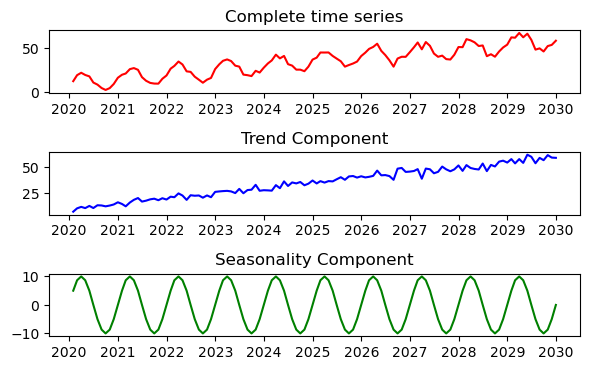

In [6]:
#plot the time series
plt.figure(figsize = (6, 6))

plt.subplot(5, 1, 1)
plt.plot(date_range , time_series , color = 'Red')
plt.title("Complete time series")

plt.subplot(5 ,1 ,2)
plt.plot(date_range , trend , color = 'Blue')
plt.title("Trend Component")


plt.subplot(5 , 1, 3)
plt.plot(date_range , seasonality , color = 'Green')
plt.title("Seasonality Component")

plt.tight_layout()
plt.show()

In [7]:
# there are two statiory
# level stationary --- if the trend is flucatate around means  , we use regression = c
# Trend stationary --- increase of decrease around a deterministic trend , we use regression = 'ct'

In [8]:

import matplotlib.pyplot as plt

result = kpss(time_series , regression = 'c')

print(f" KPSS Statistics {result[0]}")
print(f" p-value {result[1]}")
print(f" No. of lags used {result[2]}")
print(f" No. of observation used {result[3]}")


 KPSS Statistics 1.6570753052879483
 p-value 0.01
 No. of lags used 6
 No. of observation used {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Parveen\AppData\Local\Temp\ipykernel_14456\2498858491.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(time_series , regression = 'c')


In [9]:
if result[1] < 0.05:
    print("Reject Null Hypothesis, Series is not stationary")
else:
    print('Failes to Reject Null Hypothesis , Series is stationary')    

Reject Null Hypothesis, Series is not stationary
